<a href="https://colab.research.google.com/github/apophis30/imageToPrompt/blob/main/image_to_prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q /kaggle/input/stable-diffusion-data/transformers-4.18.0.dev0-py3-none-any.whl

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/kaggle/input/stable-diffusion-data/transformers-4.18.0.dev0-py3-none-any.whl'



In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.0 MB/s eta 0:00:00


In [2]:
import os
import sys
import glob
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from transformers import OFATokenizer, OFAModel
from transformers.models.ofa.generate import sequence_generator

In [8]:
!git clone --single-branch --branch feature/add_transformers https://github.com/OFA-Sys/OFA.git

Cloning into 'OFA'...
remote: Enumerating objects: 5745, done.
remote: Counting objects: 100% (932/932), done.
remote: Compressing objects: 100% (256/256), done.
remote: Total 5745 (delta 710), reused 676 (delta 676), pack-reused 4813
Receiving objects: 100% (5745/5745), 97.78 MiB | 18.49 MiB/s, done.
Resolving deltas: 100% (2243/2243), done.


In [9]:
!pip install OFA/transformers/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./OFA/transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 42.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for transformers: filename=transformers-4.18.0.dev0-py3-none-any.whl size=3916764 sha256=a4744b82ada989de4a75892dd9cad492f9250172187889332647dd47a871573e
  Stored in directory: /tmp/pip-ephem-wheel-cache-a5x0xnx1/wheels/0b/bc/ea/00b6b8998c20c4fe55affe6062a2cddda80308ef9bd5d5877c
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=f72e9f568e7f0f39d0341f64269fb559dfe89a2f688c3e9ebdf121a16d2ccb1f
  Stored in directory: /root/.cache/pip/wheels/00/24/97/a2ea5324f36bc626e1ea0267f33db6aa80d157ee977e9e42fb
Successfully built transformers sacremoses
  Attemp

In [3]:
!git lfs install
!git clone https://huggingface.co/OFA-Sys/OFA-tiny

Error: Failed to call git rev-parse --git-dir: exit status 128 
Git LFS initialized.
Cloning into 'OFA-tiny'...
remote: Enumerating objects: 55, done.
remote: Total 55 (delta 0), reused 0 (delta 0), pack-reused 55
Unpacking objects: 100% (55/55), 541.39 KiB | 8.20 MiB/s, done.


In [9]:
!git clone https://huggingface.co/OFA-Sys/OFA-large

Cloning into 'OFA-large'...
remote: Enumerating objects: 55, done.
remote: Total 55 (delta 0), reused 0 (delta 0), pack-reused 55
Unpacking objects: 100% (55/55), 541.20 KiB | 1.19 MiB/s, done.


In [10]:
CKPT_DIR= " /content/OFA-large"
IMAGE_DIR = "/content/images"

BATCH_SIZE = 24

In [14]:
from transformers import OFATokenizer
tokenizer = OFATokenizer(
    "/content/OFA-large/vocab.json",
    "/content/OFA-large/merges.txt",
)

In [52]:
model = OFAModel.from_pretrained('/content/OFA-large/pytorch_model.bin', config = '/content/OFA-large/config.json').cuda()

In [23]:
mean, std = [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]
resolution = 480
patch_resize_transform = transforms.Compose([
        lambda image: image.convert("RGB"),
        transforms.Resize((resolution, resolution), interpolation=Image.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])

# tokenizer = OFATokenizer.from_pretrained(CKPT_DIR)
# model = OFAModel.from_pretrained(CKPT_DIR, use_cache=False).cuda()
txt = " what does the image describe?"
inputs = tokenizer([txt], return_tensors="pt").input_ids

In [ ]:
import os

directory = '/content/images'

# Check if the directory exists
if os.path.isdir(directory):
    # Iterate over files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        # Perform operations on the file
        # For example, print the file name
        print(filename)
else:
    print(f"The directory '{directory}' does not exist.")


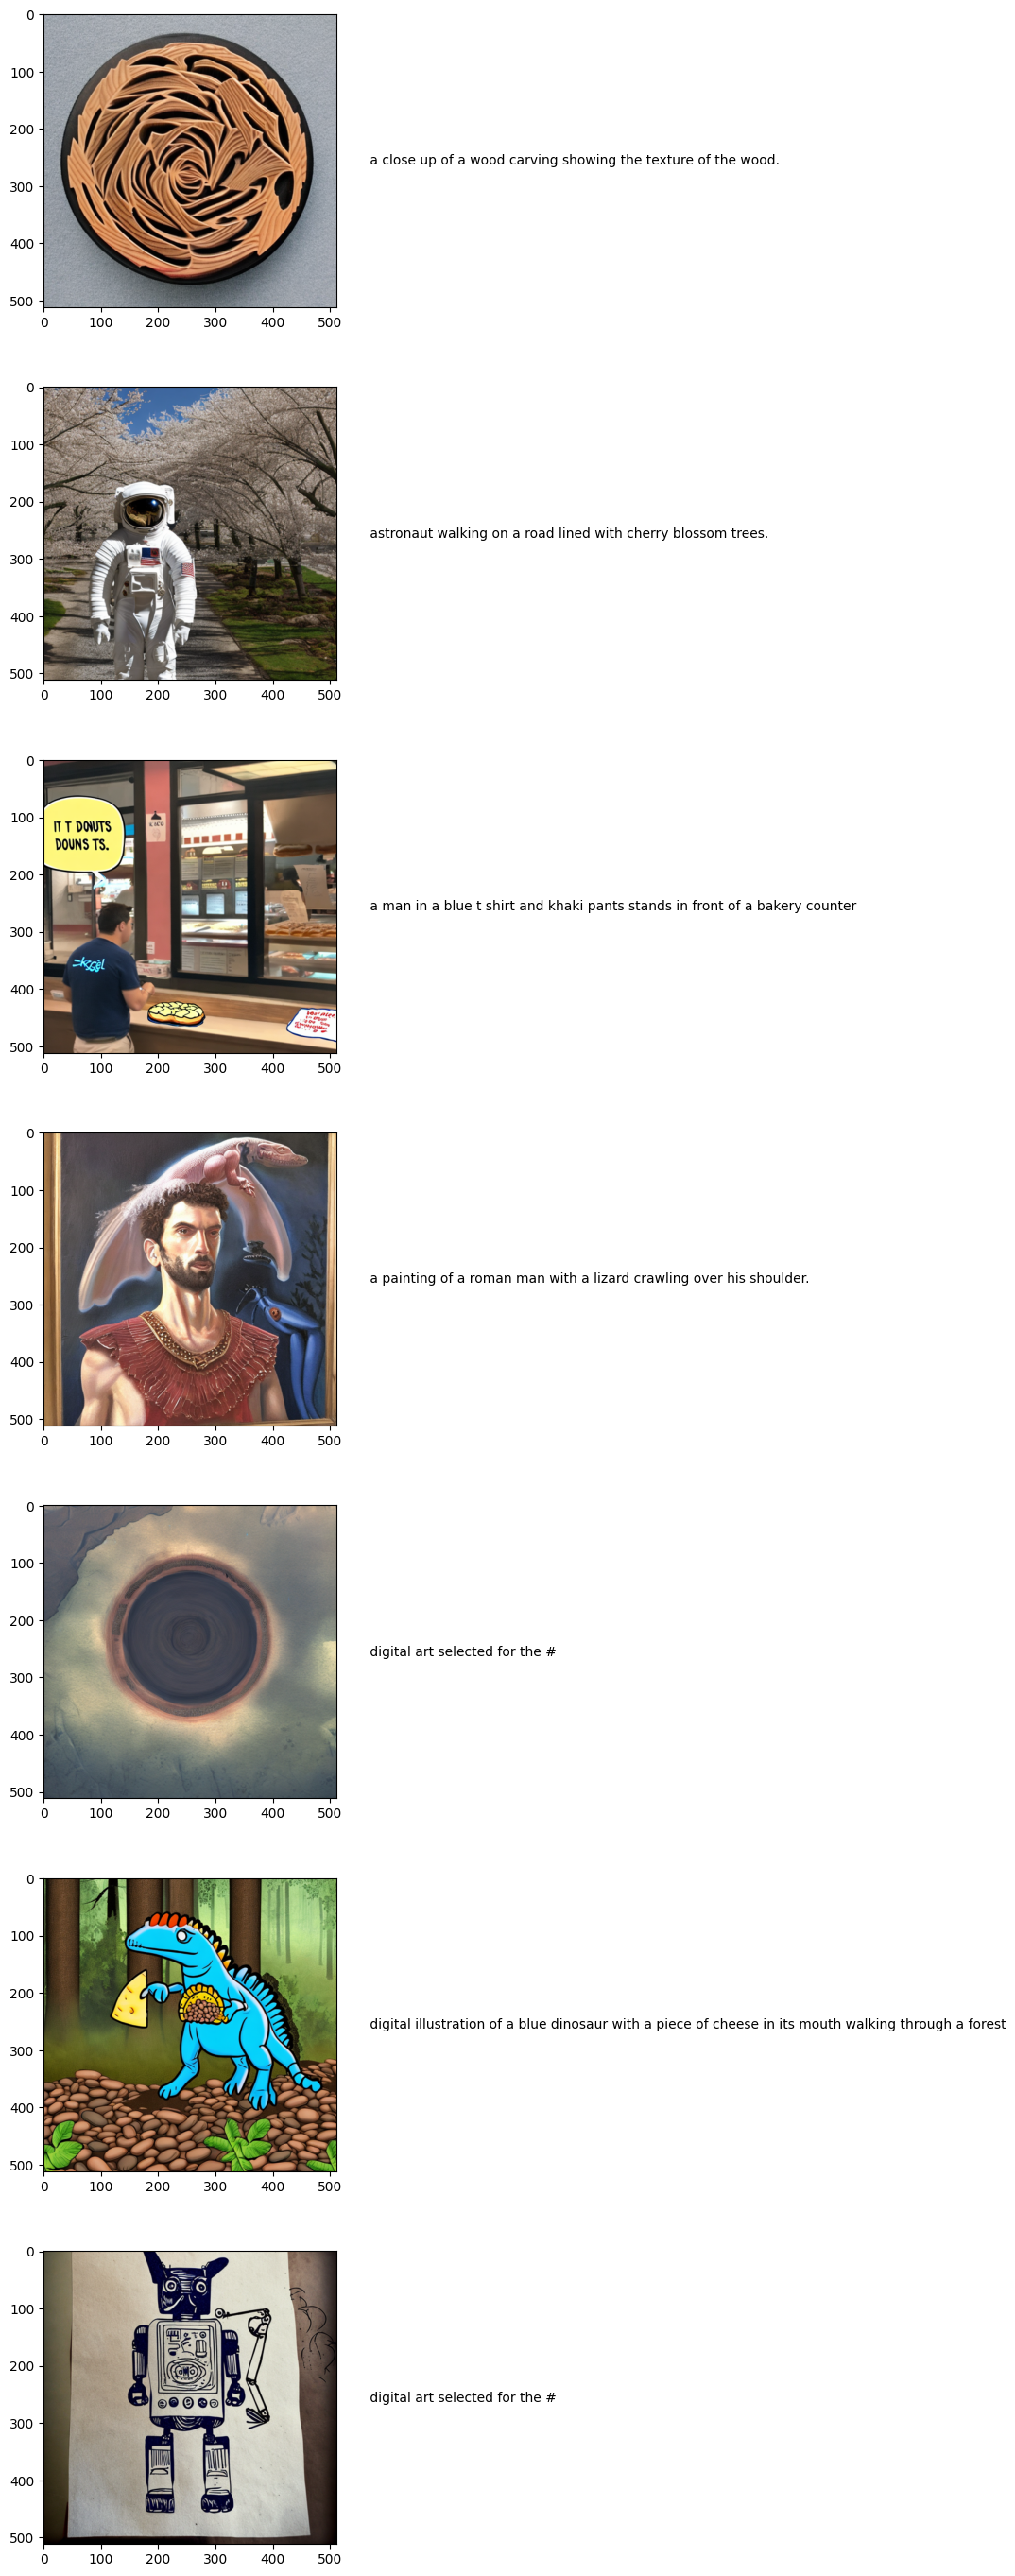

In [57]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

# Define inputs and patch_resize_transform
# inputs = ...  # Define your inputs
# patch_resize_transform = ...  # Define your patch_resize_transform

image_directory = "/content/images/"
image_files = glob.glob(image_directory + "*")[:7]

fig, ax = plt.subplots(len(image_files), 1, figsize=(4, len(image_files) * 5))

for i, impath in enumerate(image_files):
    image = Image.open(impath)
    image_t = patch_resize_transform(image).cuda().unsqueeze(0)
    out = model.generate(inputs.cuda(), patch_images=image_t.cuda(), num_beams=5, no_repeat_ngram_size=2)
    out_captions = tokenizer.batch_decode(out, skip_special_tokens=True)
    ax[i].imshow(image)
    ax[i].text(1.1, .5, out_captions[0], horizontalalignment='left', verticalalignment='center', transform=ax[i].transAxes)


In [25]:
class ImageGen(Dataset):
    def __init__(self, root, batch_size=32):
        self.root = root
        self.im_paths = os.listdir(self.root)
        self.batch_size = batch_size
        self.sz = len(self.im_paths)
        self.genlen = self.sz//self.batch_size + int(self.sz%self.batch_size > 0)

    def __getitem__(self, index):
        if index >= self.genlen:
            raise IndexError("Out of bounds")

        l, r = index*self.batch_size, min(self.sz, (index+1)*self.batch_size)

        f_paths = [os.path.join(self.root, self.im_paths[i]) for i in range(l,r)]
        f_ids = [self.im_paths[i][:-4] for i in range(l,r)]

        ims = [Image.open(f_path) for f_path in f_paths]
        ims = [patch_resize_transform(im).cuda().unsqueeze(0) for im in ims]
        ims = torch.cat(ims)

        return ims, f_ids

    def __len__(self):
        return self.genlen


In [ ]:
sys.path.append('../input/sentence-transformers-222/sentence-transformers')
from sentence_transformers import SentenceTransformer, models



In [27]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=fb6543e05910afa7fae7fa5efc8eb9725236871ed8dcf0bee149820d15a6a817
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [50]:

from sentence_transformers import SentenceTransformer

st_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')



In [53]:
sub_ids = []
sub_embeds = []

imgen = ImageGen(IMAGE_DIR, BATCH_SIZE)

for b in imgen:
    for j in range(len(b[1])):
        sub_ids.extend([f"{b[1][j]}_{i}" for i in range(384)])

    img_batch = b[0]
    out = model.generate(inputs.repeat(len(img_batch), 1).cuda(), patch_images=img_batch, num_beams=5, no_repeat_ngram_size=2)
    out_captions = tokenizer.batch_decode(out, skip_special_tokens=True)
    out_captions = [cap + ", fine details, masterpiece" for cap in out_captions]

    embeddings = st_model.encode(out_captions).flatten()
    sub_embeds.extend(embeddings)

In [54]:
sub = pd.DataFrame({"imgId_eId": sub_ids, "val": sub_embeds})
print(sub.shape)
sub.head()

(2688, 2)


,imgId_eId,val
0,227ef0887_0,-0.029742
1,227ef0887_1,0.118777
2,227ef0887_2,0.005306
3,227ef0887_3,-0.067530
4,227ef0887_4,-0.018775


In [55]:
sub.to_csv("submission.csv", index=False)

In [56]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("submission.csv")

# Display the contents of the DataFrame
print(df)


          imgId_eId       val
0       227ef0887_0 -0.029742
1       227ef0887_1  0.118777
2       227ef0887_2  0.005306
3       227ef0887_3 -0.067530
4       227ef0887_4 -0.018775
...             ...       ...
2683  a4e1c55a9_379  0.075899
2684  a4e1c55a9_380  0.114370
2685  a4e1c55a9_381  0.018966
2686  a4e1c55a9_382 -0.000980
2687  a4e1c55a9_383 -0.010091

[2688 rows x 2 columns]
